NAME : RAKSHITA MADHAVAN

TASK 6 : DATA SCIENCE AND BUSINESS ANALYTICS 

EXPLORATORY DATA ANALYSIS - SPORTS 

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
Suggest teams or players a company should endorse for its products.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()
sns.set_palette("husl",3)
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
df_deliveries = pd.read_csv('/content/gdrive/My Drive/IPL/deliveries.csv')
df_matches = pd.read_csv('/content/gdrive/My Drive/IPL/matches.csv')

Mounted at /content/gdrive


In [ ]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14,8)

In [ ]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df_deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
df_deliveries.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755


In [ ]:
df_matches.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


In [ ]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


TOSS AND MATCH ANALYSIS

In [ ]:
team_stats = pd.DataFrame({'Total matches played' : df_matches.team1.value_counts() + df_matches.team2.value_counts(), 'Total won' :  df_matches.winner.value_counts(), 
                           'Toss won' : df_matches.toss_winner.value_counts(), 'Toss lost' : ((df_matches.team1.value_counts() + df_matches.team2.value_counts()) - df_matches.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats


,Teams,Total matches played,Total won,Toss won,Toss lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,109,98,78,0.58
9,Pune Warriors,46,12,20,34,0.26


MOST TOSS WINS

Text(0.5, 1.0, 'Maximum Toss Won')

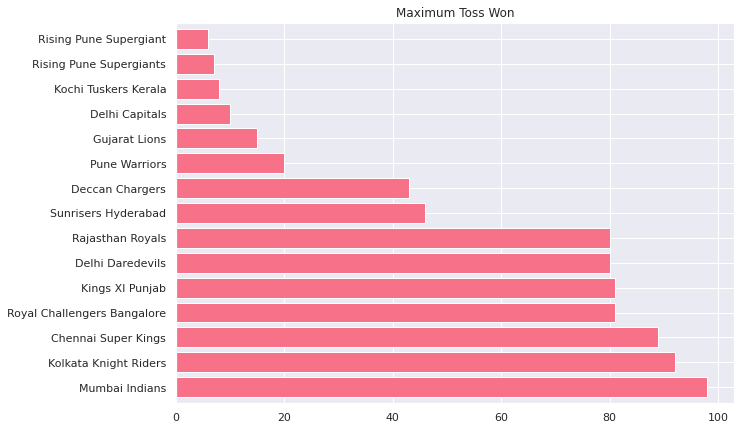

In [ ]:
plt.subplots(figsize=(10,7))
ax=df_matches['toss_winner'].value_counts().plot.barh(width=0.8)
plt.title("Maximum Toss Won")

Winning toss plays an important role in the match outcome

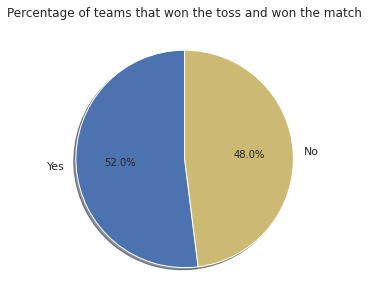

In [ ]:
toss_matchwin=df_matches[df_matches['toss_winner']==df_matches['winner']]
slices=[len(toss_matchwin),(len(df_matches)-len(toss_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['b','y'])
plt.title("Percentage of teams that won the toss and won the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Totals wins of each team

Text(0, 0.5, 'Wins')

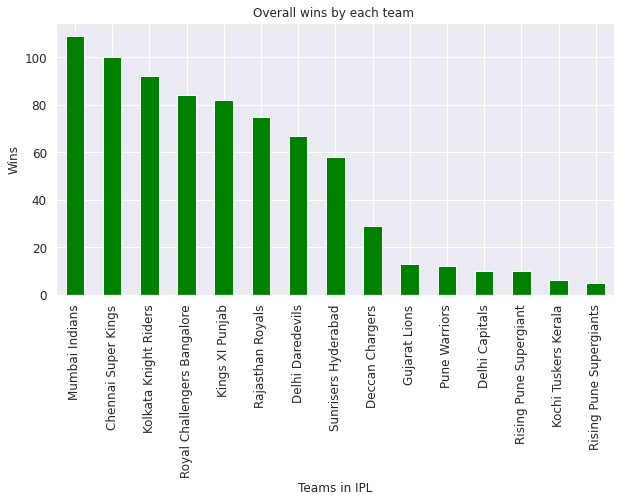

In [ ]:
Total_win = df_matches.winner.value_counts()
ax = Total_win.plot(kind='bar',title ="Overall wins by each team ",figsize=(10,5), fontsize=12,color='green')
ax.set_xlabel("Teams in IPL",fontsize=12)
ax.set_ylabel("Wins",fontsize=12)

In [ ]:
print("Overview of deliveries dataset :\n")
print(df_deliveries.info())
print("\n\n")
print("Overview of matches dataset :\n")
print(df_matches.info())

Overview of deliveries dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extr

MATCHES DATASET ANALYSIS

Season-wise winners

In [ ]:
winner_each_season = df_matches.drop_duplicates(subset=['season'],keep='last')[['season', 'winner']].reset_index(drop=True)
winner_each_season

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


Number of season wins by each team

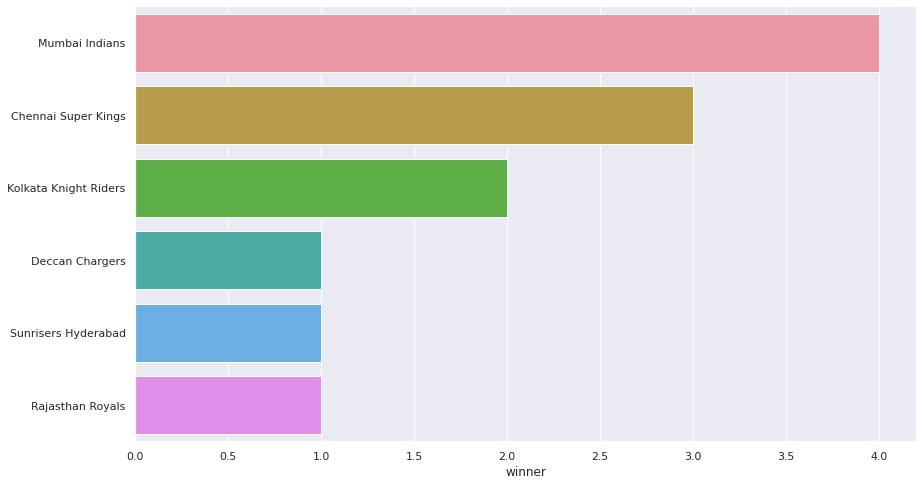

In [ ]:
data = winner_each_season.winner.value_counts()
sns.barplot(y = data.index, x = data)

Basic Overview of Matches

In [ ]:
print("\n Top 10 Prominent Players of IPL :\n")
print(df_matches['player_of_match'].value_counts()[:10])


 Top 10 Prominent Players of IPL :

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64


In [ ]:
print("\n Most Winning Team and Number Of Matches: \n")
print(df_matches['winner'].value_counts())


 Most Winning Team and Number Of Matches: 

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


In [ ]:
print("\n Player Of The Match For Maximum number of Matches : \n")
print(df_matches['player_of_match'].value_counts().idxmax())


 Player Of The Match For Maximum number of Matches : 

CH Gayle


In [ ]:
print(" Number of wins with huge run margin : \n ")
runs_margin = df_matches[(df_matches['win_by_runs']>=100)]
print(runs_margin.winner.value_counts())

 Number of wins with huge run margin : 
 
Royal Challengers Bangalore    3
Mumbai Indians                 2
Kolkata Knight Riders          1
Kings XI Punjab                1
Sunrisers Hyderabad            1
Rajasthan Royals               1
Name: winner, dtype: int64


Royal Challengers Bangalore has won 3 matches with a 100+ margin 

In [ ]:
print(" Number of wins with huge wicket margin : \n ")
wickets_margin = df_matches[(df_matches['win_by_wickets']>=8)]
print(wickets_margin.winner.value_counts())

 Number of wins with huge wicket margin : 
 
Kolkata Knight Riders          16
Royal Challengers Bangalore    16
Mumbai Indians                 13
Delhi Daredevils               13
Chennai Super Kings            11
Rajasthan Royals               11
Sunrisers Hyderabad             8
Kings XI Punjab                 8
Deccan Chargers                 2
Kochi Tuskers Kerala            2
Rising Pune Supergiants         1
Rising Pune Supergiant          1
Name: winner, dtype: int64


Kolkata Knight Riders has won 16 matches with 8+ wickets in hand 

In [ ]:
print("Match where team won by highest runs :\n")
print(df_matches.iloc[df_matches['win_by_runs'].idxmax()])
print("\n\n")
print("Match where team won by highest wickets :\n")
print(df_matches.iloc[df_matches['win_by_wickets'].idxmax()])

Match where team won by highest runs :

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object



Match where team won by highest wickets :

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1     

Now we know,
          Mumbai Indians won with highest run margin against Delhi Daredevils
          and Kolkata Knight Riders won with highest wicket margin against Gujarat Lions.

In [ ]:
print("\nNumber Of Super Over Matches  :\n")
print(df_deliveries['is_super_over'].value_counts())


Number Of Super Over Matches  :

0    178997
1        81
Name: is_super_over, dtype: int64


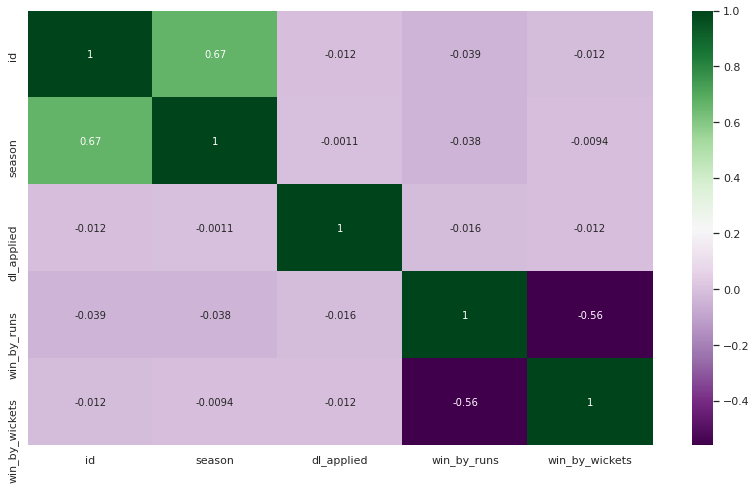

In [ ]:
sns.heatmap(df_matches.corr(),annot = True, cmap = 'PRGn')

 Number of runs in each over from all matches : 


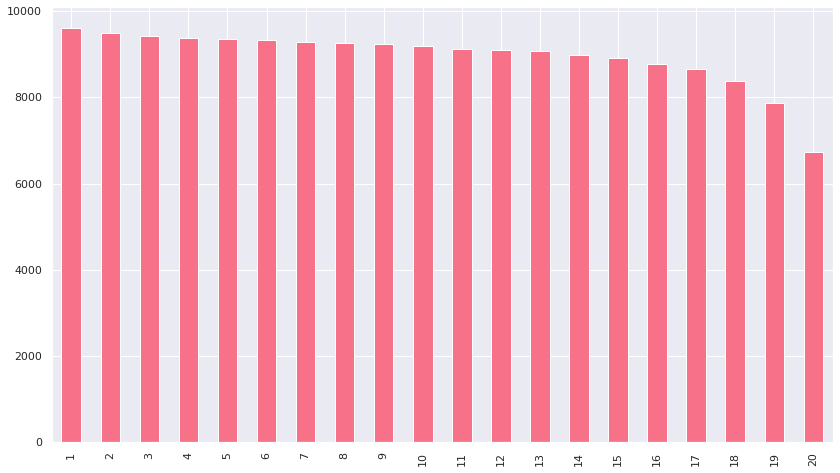

In [ ]:
print(" Number of runs in each over from all matches : ")
df_deliveries['over'].value_counts().plot(kind = 'bar')

BATSMEN OVERVIEW

In [ ]:
batsmen = df_deliveries.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen = batsmen.sort_values(['balls','runs'], ascending=False)
batsmen['strike_rate'] = batsmen['runs']/batsmen['balls'] * 100
batsmen['strike_rate'] = batsmen['strike_rate'].round(2)
batsmen.head(15)

,balls,runs,strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


V Kohli is the batsman who scored the highest runs.

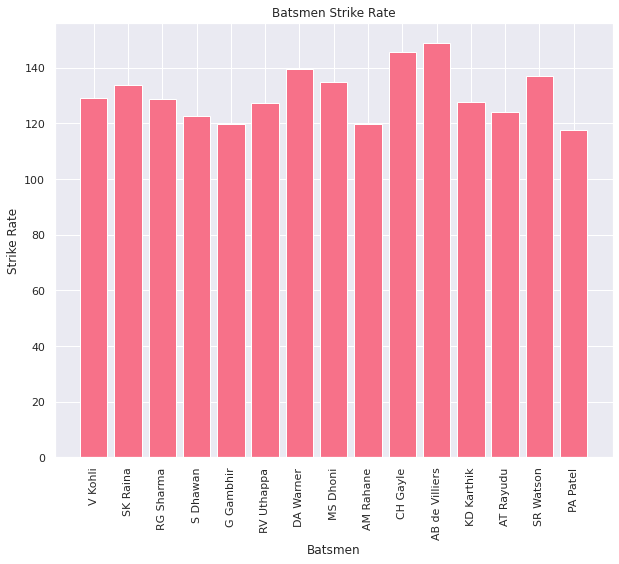

In [ ]:
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:15]
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['strike_rate'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Batsmen Strike Rate')
plt.show()

AB de Villiers is the batsman with the highest strike rate

BOWLER OVERVIEW

In [ ]:
bowler_wickets = df_deliveries.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:15]
print(" Bowlers with most wickets :\n")
TopBowlers

 Bowlers with most wickets :



,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136


A good bowler should not only have taken maximum wickets but also have a low economy rate

In [ ]:
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = TopBowlers.sort_values(['economy'], ascending=True)[:15]
print("Top bowlers based on their economy :\n")
TopBowlers

Top bowlers based on their economy :



,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,136,4.293956
R Vinay Kumar,2186,3043,127,4.310220
DJ Bravo,2711,3733,168,4.357353
PP Chawla,3157,4153,156,4.561040
SR Watson,2137,2751,107,4.660851
A Nehra,1974,2537,121,4.668506
RA Jadeja,2541,3221,116,4.733313
Z Khan,2276,2860,119,4.774825
A Mishra,3172,3850,165,4.943377




OBSERVATIONS :


 
1.   V Kohli and SK Raina are batsmen who scored the most runs in the tournament.

2.   AB de Villiers and CH Gayle are batsmen with the highest strike rate.





3.   SL Malinga and DJ Bravo are bowlers who had taken the most wicket

4.   UT Yadav and R Vinay Kumar are two bowlers with the lowest economy rate.


Suggestions for endorsement from the above observations :


*  Batsmen : V Kohli, SK Raina, AB de Villiers , CH Gayle

*  Bolwers : SL Malinga , DJ Bravo, UT Yadav  

*  Teams : Mumbai Indians , Chennai Super Kings